# Preprocesamiento de datos y Pilelines: Datos musicales.

Tenemos un conjunto de datos que contiene características categóricas (el género de música). Cómo no son numéricos scikit-learn no los aceptará, por lo que debemos convertirlos en funciones numéricas.

Esto lo logramos dividiendo en múltiples características binarias llamadas **variables ficticias**, una para cada categoría.
Cero significa que la observación no era de esa categoría, mientras que un significa que si lo era.
Por ejemplo digamos que estamos trabajando con un conjunto de datos musicales que tiene un género. 0 significa que no es Rock y 1 significa que si lo es.

*(Si son varias categorías, creamos funciones binarias para cada género. Cómo cada canción tiene un género, cada fila tendrá un 1 en una de las diez columnas y ceros en el resto. Si una canción no pertence a ninguno de los primeros nueve géneros, implícitamente es una canción de rock. Esto significa que sólo necesitamos nueve características, por lo que podemos eliminar la columna rock. Si no hacemos esto, estaremos duplicando informción, lo que puede ser un problema para algunos modelos)*.

In [110]:
# LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [39]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/music_clean.csv'
music_df = pd.read_csv(ruta_archivo,index_col = 0)
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


## Transformación de Datos

- Construir un modelo de regresión utilizando todas las funciones del conjunto de datos para predecir la popularidad de las canciones.

In [5]:
# Crear variables ficticias:
## drop_first = True, nos eliminará un columna como queremos
#music_dummies = pd.get_dummies(music_df["genre"], drop_first = True)

#Imprimir
#print(music_dummies.head())

- Si el conjunto de datos solo tiene una característica categórica podemos omitir el paso de combinar variables.
- Si no especificamos una columna, las columnas binarias del nuevo conjunto de datos tendrán el nombre de cada caracteristica original con prefijo, por lo que comenzarán con guión bajo de género. La columna de género se elimina automáticamente.

In [6]:
# Convertir variables categóricas
music_dummies = pd.get_dummies(music_df, drop_first = True)

# Verificar las columnas del nuevo data frame
music_dummies.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')

### Manejo de datos faltantes

1. Un enfoque común es **eliminar las observaciones faltantes que representan menos del $5\%$ de todos los datos**.
2. Si faltan valores en nuestra columna de subconjunto se eliminaran toda la fila.
3. Otra opción es **imputar** los datos faltantes. Esto significa hacer una suposición fundamentada sobre cuáles podrían ser los valores faltantes.
4. Podemos imputar la media o la mediana de todas las entradas no faltantes para una caracteristica determinada.
5. Para valores categóricos comúnmente se imputa el valor más frecuente.
6. ***Tenga en cuenta que debemos dividir datos antes de imputarlos para evitar fugas de datos***.

In [36]:
# Filas faltantes de cada columna de music_df
print(music_df.isna().sum().sort_values())

# Pasamos una lista de columnas con menos del 5% de valores faltantes al argumento del subconjunto
# music_df = music_df.dropna(subset=["genre", "popularity","loudness","liveness","tempo"])

# Imprimir
# print(music_df.isna().sum().sort_values())

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


## Análisis de datos

- Ajustar los datos con un MODELO DE REGRESIÓN LINEAL y realizar una *validación cruzada* con Kfold para predecir la popularidad de una canción de la siguente manera:

In [33]:
# Crear matrices de caracteristicas y objetos
X = music_dummies.drop("popularity", axis = 1).values
y = music_dummies["popularity"].values

# Dividir en conjunto de datos de entranamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 42)

# Instanciar KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Instanciar la regresión lineal
linreg = LinearRegression()

# Llamar a cross_val_score
linreg_cv = cross_val_score(linreg, X_train, y_train, cv = kf,
                           scoring = "neg_mean_squared_error")

# Tomar la raíz cuadara para calcular RMSE
print(np.sqrt(-linreg_cv))

# Imprimir la media de RMSE
print("Media de RMSE del modelo de regresión lineal: {}".format(np.mean(np.sqrt(-linreg_cv))))
print("Desviación estándar de la matriz objetivo: {}".format(np.std(-linreg_cv)))

[10.33283663 10.92843432  9.44214931  9.38877822  9.78719123]
Media de RMSE del modelo de regresión lineal: 9.975877941162304
Desviación estándar de la matriz objetivo: 11.82417513282017


**NOTA:** "neg_mean_squared_error", devuelve el MSE negativo. Esto se debe a que las métricas de validación cruzada de scikit_learn suponen una puntación más alta es mejor, por lo que MSE se cambia a negativo para contrarrestar esto.

- Instanciar un MODELO RIDGE como comparación del modelo de regresión lineal.

In [34]:
# Instanciar un modelo ridge
ridge = Ridge(alpha=0.2)

# instanciar  KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Haz la validación cruzada
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calcula RMSE
rmse = np.sqrt(-scores)
print("Media RMSE del modelo de regresión Ridge: {}".format(np.mean(rmse)))
print("Desviación estándar de la matriz objetivo: {}".format(np.std(y)))

Media RMSE del modelo de regresión Ridge: 10.334930115405797
Desviación estándar de la matriz objetivo: 14.02156909907019


**Interpretación**: Dado la RMSE del modelo de regresion lineal es más baja que la de Ridge. Entonces, el modelo de regresión lineal está haciendo un mejor trabajo al predecir la popularidad de las canciones, ya que su error es menor.

- Ver como podemos manejar los datos faltantes **imputandolos.**

In [42]:
# Dividir, almacenándolos como X_cat y X_num respectivamente, 
# junto con nuestra matriz de destino "y".
X_cat = music_df["genre"].values.reshape(-1,1)
X_num = music_df.drop(["genre", "popularity"], axis = 1).values
y = music_df["popularity"].values

# Crear un conjuntos de puebas y otro de entrenamiento categóricos
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y,
                                                           test_size = 0.2,
                                                           random_state = 12)

# Crear un conjuntos de puebas y otro de entrenamiento numérico
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y,
                                                           test_size = 0.2,
                                                           random_state = 12)

# Para imputar valores categóricos faltantes, crear una instancia
# SimpleImputer espera que Numpy.NaN represente los valores faltantes
imp_cat = SimpleImputer(strategy = "most_frequent")

# Ajustar el modelo imp_cat a los datos, para imputar los valores faltantes 
# de las cararacterísticas categóricas de entranamiento
X_train_cat = imp_cat.fit_transform(X_train_cat)

# Ajustar para la categoría de prueba, las llamamos TRANSFORMACIÓN DE PUNTOS
X_test_cat = imp_cat.transform(X_test_cat)

# Para los datos numéricos, crear una instancia de otro imputador 
imp_num = SimpleImputer()

# Ajustar y transformar las funciones de entranamiento y transformamos 
# las funciones de prueba
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

# Combinar los datos de entranamiento usando numpy.append, pasar 
# nuestras dos matrices y establecer el eje igual 1
X_train = np.append(X_train_num, X_train_cat, axis = 1) 

# Repitir lo mismo para los datos de prueba
X_train = np.append(X_test_num, X_test_cat, axis = 1) 

**NOTA:** Los imputadores se conocen como transformadores

### Usando Pipelines

Usando una tubería (pipeline), que es un objeto utilizado para que ejecute una serie de transformaciones y cree un modelo en un único flujo de trabajo.

#### Modelo de regresión logística

- Realizar una clasificación binaria con el MODELO DE REGRESIÓN LOGISTA para predecir si una canción es rock u otro género.

In [51]:
# Eliminar los valores faltantes que represetan menos del 5% de nuestros datos
# music_df = music_df.dropna(subset = ["genre","popularity","loudness","liveness","tempo"])

# Convertir los valores en la columna de género en un atributo binario, que será el objetivo, 
# a 1 si es Rock en caso contrario 0 
# music_df["genre"] = np.where(music_df["genre"] == "Rock",1,0)

# Crear matrices X e y
X = music_df.drop("genre", axis = 1).values
y = music_df["genre"].values

# Para construir una canalización construimos una lista de pasos que contienen tuplas con
# los nombres de los pasos especificados como cadenas y

# Crear una instancia del transformador o modelo
steps = [("imputation", SimpleImputer()),
        ("logistic_regression", LogisticRegression())]

# Pasar esta lita al crear una instancia de Pipeline
pipeline = Pipeline(steps)

# Dividir nuestros datos y ajustamos la canalización a los datos de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                          test_size = 0.3,
                                          random_state = 42)

# Ajustar la canalización a los datos de entrenamiento.
pipeline.fit(X_train, y_train)

# Calcular la precisión
print("La precisión del modelo de regresión logística es: {}".format(pipeline.score(X_test, y_test)))

La precisión del modelo de regresión logística es: 0.73


**Interpretación:** La precisión del MODELO DE REGRESIÓN LOGÍSTICA es de 0.73. Es decir, el modelo esta prediciendo los datos de prueba en un 73%

#### Pipeline para la predicción del género: Modelo KNN

Imputaremos valores faltantes usando la media para cada atributo y construir un MODELO KNN para la clasificación del género de la canción.

In [58]:
# Crear matrices X e y
X = music_df.drop("genre", axis = 1).values
y = music_df["genre"].values

# Dividir nuestros datos y ajustamos la canalización a los datos de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                          test_size = 0.3,
                                          random_state = 42)

# Instanciar un imputador para valores faltantes
imp_mean = SimpleImputer()

# Instanciar un modelo KNN
knn = KNeighborsClassifier(n_neighbors = 3)

# Construir los pasos para el pipeline
steps = [("imputer", imp_mean),
        ("knn", knn)]

# Crear el pipeline
pipeline = Pipeline(steps)

# Entrenar el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones con el set de prueba
y_pred = pipeline.predict(X_test)

# Imprimir la confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[75 75]
 [74 76]]


### Centrado y escalado

- Al aplicar describe(), para ver que la variable "speechiness" sólo tiene decimales y la variable "loudness" sólo tiene valores negativo. Es decir, tiene distinas escalas; lo que puede influir desproporcionalmente en nuestro modelo.

- Por ejemplo KNN usa la distancia explícitamente al hacer predicciones, por esta razón queremos que las funciones estén en una escala similar.

- Para lograr esto, podemos **normalizar o estandarizar nuestros datos**, lo que a menudo se denomina **escalamiento y centrado**.

**¿CÓMO ESCALAR NUESTROS DATOS?** 

- **Estandarización:** De cualquier columna, podemos restar la media y dividirla por la varianza. Esto hace que las características estén centradas alrededor de cero y tenga una varianza de uno.
- Podemos restar el mínimo y dividir por el rango de los datos, para que el conjunto de datos normalizado tenga un mínimo de cero y un máximo de uno.
- También podemo centrar nuestros datos para que oscilen entre -1 y 1.

- PARA ELLO USAREMOS StandardScaler() de pcikit-learn

In [59]:
# Utilizar Describe() para observar que nuestros datos necesitan ser 
# centrados y escalados
print(music_df[["duration_ms","loudness","speechiness"]].describe())

        duration_ms     loudness  speechiness
count  1.000000e+03  1000.000000  1000.000000
mean   2.172204e+05    -8.253305     0.077879
std    1.175582e+05     5.158523     0.089451
min   -1.000000e+00   -38.718000     0.023400
25%    1.806562e+05    -9.775500     0.033100
50%    2.163000e+05    -6.855000     0.043600
75%    2.605025e+05    -4.977750     0.074950
max    1.617333e+06    -0.883000     0.710000


In [73]:
# Crear las matrices de características y objetivos
X = music_df.drop("genre", axis = 1).values
y = music_df["genre"].values

# Divir nuestros datos para evitar la fuga de datos.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 42)

# Instanciar un objeto StandardScaler
scaler = StandardScaler()

# Ajustar a los datos
X_train_scaled = scaler.fit_transform(X_train)

# transformar en las funciones de prueba
X_test_scaled = scaler.transform(X_test)

# Observar la media y la desviación estándar de las columnas 
print("Media de las columnas: {}".format(np.mean(X)))
print("Desviación estándar de las columnas: {}".format(np.std(X)))
print("")
print("Media estandarizada de las columnas: {}".format(round(np.mean(X_train_scaled)))) 
print("Desviación estandarizada de las columnas: {}".format(round(np.std(X_train_scaled))))

Media de las columnas: 19762.413275219726
Desviación estándar de las columnas: 71791.8429618064

Media estandarizada de las columnas: 0
Desviación estandarizada de las columnas: 1


- Utilizar escalador en una PIPELINE

In [74]:
# Crear las matrices de características y objetivos
X = music_df.drop("genre", axis = 1).values
y = music_df["genre"].values

# Divir nuestros datos para evitar la fuga de datos.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 42)

# Construimos un objeto de canalización para escalar nuestros datos y 
## usamos un modelo KNN con seis vecinos.
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors = 6))]
pipeline = Pipeline(steps)

# Dividimos nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 21)

# Ajustamos el modelo a nuestros datos
knn_scaled = pipeline.fit(X_train, y_train)

# Predecimos con nuestro conjunto de prueba
knn_scaled.predict(X_test)

# Imprimir
print(knn_scaled.score(X_test, y_test))

0.805


**Interpretación:** Dado que se NORMALIZARON los datos, tenemos que para un MODELO KNN, existe una predicción correcta de un 80%. Muy superior a la predicción del MODELO DE REGRESIÓN LOGÍSTICA *rellenando* datos con un 73%

- Comparar el MODELO KNN con el uso de datos ***sin escalar***.

In [75]:
# Instanciar y ajustamos el model a los datos
knn_unscaled = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)

# Imprimir
print(knn_unscaled.score(X_test, y_test))

0.515


**Interpretación:** La precisión del MODELO KNN sin escalar el conjunto de datos llega a 50%. Muy por debajo de los 80%, escalandolos.

**NOTA:** .score() para KNN devuelve la precisión del modelo y para regresión devuelve $R^2$.

- Ver ahora cómo podemos utilizar la ***validación cruzada con pipeline*** para el MODELO KNN con datos escalados

In [94]:
# Crear las matrices de características y objetivos
X = music_df.drop("genre", axis = 1).values
y = music_df["genre"].values

# Divir nuestros datos para evitar la fuga de datos.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 21)

# Canalizar
steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]
pipeline = Pipeline(steps)

# Especificar nuestro espacio de hiperparámetros creando un diccionario
## Estamos ajustando n_vecinos en el modelo KNN
parameters = {"knn__n_neighbors": np.arange(1,50)}

# Realizar una búsqueda en cuadrícula sobre nuestros parámetros mediante 
# una instancia del objeto GridSearchCV, pasando nuestra canalización y 
# establecer el argumento param_grid 
cv = GridSearchCV(pipeline, param_grid = parameters)

# Ajustamos a nuestros datos de entranamiento
cv.fit(X_train, y_train)

# Predecir utilizando nuestro conjunto de prueba
y_pred = cv.predict(X_test)

# Imprimir el atributo best_score_ 
print(cv.best_score_)

# Imprimir mejores parámetros
print(cv.best_params_)

0.8137500000000001
{'knn__n_neighbors': 12}


- Probar con 12 n-vecinos más cercanos 

In [95]:
# Pipilines
steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors = 12))
]
pipeline = Pipeline(steps)

# Ajustar pipeline a los datos
pipeline.fit(X_train, y_train)

# Evaluar la precisión
pipeline.score(X_test, y_test)

0.82

**Interpretación:** El MODELO KNN tiene una precisión del 82% al usar datos normalizados y utilizar 12 vecinos más cercanos.

### Centrado y escalado para la regresión Lasso

Usaremos un pipeline para pre-procesar los atributos de music_df y construir un modelo de regresión lasso para predecir la sonoridad de una canción.

In [98]:
# Crear las matrices de características y objetivos
X = music_df.drop("loudness", axis = 1).values
y = music_df["loudness"].values

# Dividir los datos para evitar la fuga de datos.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 42)
# Crear los pasos del pipeline
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha = 0.5))]

# Instanciar el pipeline
pipeline = Pipeline(steps)

# Ajustar el modelo a los datos
pipeline.fit(X_train, y_train)

# Calcular e imprimir R-cuadrada
print("El R^2 es: {}".format(pipeline.score(X_test, y_test)))

El R^2 es: 0.7200653029753489


**Interpretación:** Para el MODELO DE REGRESIÓN LASSO las características se explican en un 72%. Es decir, el R^2 es de 0.72

### Centrado y escalado para la clasificación: Regresión logística

Se construirá un pipeline para escalar atributos en el set de datos music_df y realizar la validación cruzada grid search usando un modelo de regresión logística con diferentes valores para el hiperparámetro C. La variable objetivo aquí es "genre", que contiene los valores binarios 1 para rock y 0 para cualquier otro género.

- Ajustar el escalado y construcción de modelos en un pipeline para **validación cruzada**.

In [104]:
# Crear las matrices de características y objetivos
X = music_df.drop("genre", axis = 1).values
y = music_df["genre"].values

# Construir steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Crear el espacio de parámetros
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=21)

# Instanciar el objeto grid search
cv = GridSearchCV(pipeline, param_grid=parameters)

# Entrenar con los datos de entrenamiento
cv.fit(X_train, y_train)
print(cv.best_score_, "\\n", cv.best_params_)

0.8625 \n {'logreg__C': 0.15873684210526315}


- Crear el MODELO DE REGRESIÓN LOGÍSTICA con el mejor hiperparámetro 

In [105]:
# Crear una instancia del escalador y ajustarlo a los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Crear una instancia del modelo de regresión logística con el hiperparámetro especificado
logreg = LogisticRegression(C=0.15873684210526315)

# Ajustar el modelo a los datos de entrenamiento escalados
logreg.fit(X_train_scaled, y_train)

# Escalar los datos de prueba
X_test_scaled = scaler.transform(X_test)

# Calcular la precisión del modelo utilizando .score()
accuracy = logreg.score(X_test_scaled, y_test)

print(f"La precisión del modelo de regresión logística es: {accuracy}")

La precisión del modelo de regresión logística es: 0.845


**Interpretación:** Al aplicar el "C" optimo para el MODELO DE REGRESIÓN LOGÍSTICA a los datos de prueba, tenemos una precisión del 84%.

### Evaluando múltiples modelos

Existen algunos principios que pueden guiarnos a la hora de tomar la decisión de cual modelo será el mejor.

1. El **tamaño del conjunto de datos** juega un papel importante.
    - Menos funciones significan un modelo más simple y pueden reducir el tiempo de capacitación.
    - Algunos modelos, como las redes neuronales artificiales, requieren una gran cantidad de datos para funcionar bien.
2. Es posible que necesitemos un modelo **interpretable**, para poder explicar a las partes interesadas cómo se hicieron las predicciones. Por ejemplo en la regresión lineal podemos calcular e interpretar los coeficientes del modelo.
3. La **flexibilidad** podría ser importante para obtener las predicciones más precisas.
    - Generalmente los modelos flexibles hacen menos suposiciones sobre los datos, por jemplo un modelo KNN no supone una relaciçón lineal entre las características y el objeto.

---------------------------

- Los ***modelos de regresión*** se pueden evaluar utilizando:
    - la raíz del error cuadrático medio,
    -  el valor de $R^2$.
- Todos los ***modelos de clasificación*** se pueden analizar utilizando:
    - Accuracy (precision)
    - Matriz de confusión (Confussion Matrix) y sus métricas asociadas
        - Precisión,
        - recall,
        - F1-score
    - ROC AUC (Regresión logística)
 
***Por lo tanto, un enfoque es seleccionar varios modelos y una métrica***.

Recordemos que el rendimiento de algunos modelos como:
- KNN
- Regresión lineal
- Regresión logísta
- Redes neuronales artificiales

se ven afectados por el **escalado** de nuestros datos. ***Por lo que es mejor escalar nuestros datos antes de evaluar modelos listos para usar.***

-----------------------------------

Evaluaremos tres modelos para para la clasificación binaria de género de canción:
    - KNN
    - Regresión logística
    - Clasificador de árbol  de decisión
    

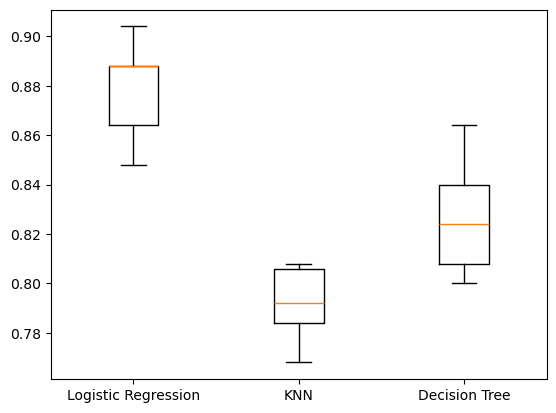

In [102]:
# Crear matrices de caracteristicas y objetos
X = music_df.drop("genre", axis = 1).values
y = music_df["genre"].values

# Dividir datos en entrenamiento y prueba
## El valor de test_size predeterminado será 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42)

# Instanciar StandardScaler
scaler = StandardScaler()

# Escalar características en el conjunto de entranamiento
X_train_scaled = scaler.fit_transform(X_train)

# Escalar características en el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Crear un pipeline mediante un diccionario con los modelos
models = {
    "Logistic Regression": LogisticRegression(), 
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Crear una lista vacía para almacenar los resultados
results = []

# Recorrer los modelos en nuestro diccionario de modelos, utilizando su método de valores de puntos
for model in models.values():
    # Crear una instancia de un objeto KFold
    kf = KFold(n_splits = 6, random_state = 42, shuffle = True)
    # Realizar una validación cruzada, de forma predeterminada la puntación será la precisión
    cv_result = cross_val_score(model, X_train_scaled, y_train, cv = kf)
    # Agregar los resultados de la validación cruzada a nuestra lista de resultados
    results.append(cv_result)

# Crear una diagrama de cajas de nuestros resultados 
plt.boxplot(results, labels = models.keys())
plt.show()

**Interpretación:** 
1. El resultado nos muestra el rango de puntaciones de precisión de la validación cruzada.
2. También podemos ver la puntuación media de la validación cruzada para cada modelo representada por la línea naranja en cada cuadro.
3. Vemos que el MODELO DE REGRESIÓN LOGÍSTA tiene la mejor puntación media.

#### Evaluar el conjunto de prueba

In [107]:
# Recorrer los nombres y valores del diccionario utilizando el método de elementos de puntos
for name, model in models.items():
    # Ajustar el modelo a los datos
    model.fit(X_train, y_train)
    # Calcular la precisión
    test_score = model.score(X_test_scaled, y_test)
    # Imprimir 
    print("{} precisión del conjunto de prueba: {}".format(name, test_score))

Logistic Regression precisión del conjunto de prueba: 0.78
KNN precisión del conjunto de prueba: 0.485
Decision Tree precisión del conjunto de prueba: 0.54


**Interpretación:** La función logística funciona mejor para este problema si utilizamos la precisión como métrica.

### Visualizando el desempeño del modelo de regresión

Ahora que se vio cómo evaluar varios modelos listos a usar, construiremos tres modelos de regresión para predecir los niveles de "energy" de una canción.

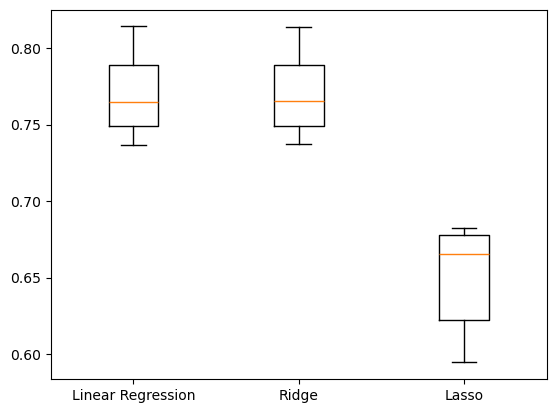

In [108]:
# Crear matrices de caracteristicas y objetos
X = music_df.drop("energy", axis = 1).values
y = music_df["energy"].values

# Dividir los datos en entrenamiento y prueba
## El valor de test_size predeterminado será 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42)

# Crear pipelines de los modelos a evaluar
models = {"Linear Regression": LinearRegression(), 
          "Ridge": Ridge(alpha=0.1), 
          "Lasso": Lasso(alpha=0.1)}
results = []

# Iterar sobre los valores de los modelos
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Realizar validación cruzada
  cv_scores = cross_val_score(model, X_train, y_train, cv = kf)
  
  # Anexar los resultados
  results.append(cv_scores)

# Crear un boxplot de los resultados
plt.boxplot(results, labels = models.keys())
plt.show()

**Interpretación:** Vemos que los MODELO de REGRESIÓN LINEAL Y RIDGE tiene una buena puntuación.

#### Predicción con el set de prueba

Vemos que los MODELO de REGRESIÓN LINEAL Y RIDGE parecieron producir resultados similares. Sería apropiado seleccionar cualquiera de esos modelos; sin embargo, puedes comprobar el ***rendimiento predictivo*** en el set de prueba para ver si uno puede superar al otro.

Usarás el error cuadrático medio (RMSE) como métrica.

In [114]:
# Instanciar StandardScaler
scaler = StandardScaler()

# Escalar características en el conjunto de entranamiento
X_train_scaled = scaler.fit_transform(X_train)

# Escalar características en el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
  
  # Entrenar el modelo con los datos de entrenamiento
  model.fit(X_train_scaled, y_train)
  
  # Realizar predicciones con el set de prueba
  y_pred = model.predict(X_test_scaled)
  
  # Calcular test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared = False)
  print("{} Conjunto de prueba RMSE: {}".format(name, test_rmse))

Linear Regression Conjunto de prueba RMSE: 0.11109818526605351
Ridge Conjunto de prueba RMSE: 0.11110048128156672
Lasso Conjunto de prueba RMSE: 0.17793986625718447


**Interpretación:** La Regresión Lineal y Ridge tienen un rendimiento muy similar y superior al de Lasso, según el RMSE en el conjunto de prueba. El MODELO DE REGRESIÓN LINEAL es el que mejor rendimiento muestra con el RMSE más bajo.

### Visualizando el desempeño del modelo de clasificación

La columna "popularity" del set de datos music_df será convertido a valores binarios, con 1 que representa popularidad mayor o igual que la mediana de la columna "popularity" y 0 que indicará la popularidad por debajo de la mediana.

Vamos a construir y visualizar los resultados de tres modelos diferentes para predecir si una canción es popular o no.

In [118]:
# Calcular la mediana de la columna 'popularity'
median_popularity = music_df['popularity'].median()

# Crear una nueva columna 'popularity_binary' que es 1 si 'popularity' es mayor o igual que la mediana, y 0 en caso contrario
music_df['popularity_binary'] = (music_df['popularity'] >= median_popularity).astype(int)

# Imprimir
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre,popularity_binary
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1,1
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1,1
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1,1
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1,1
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1,1


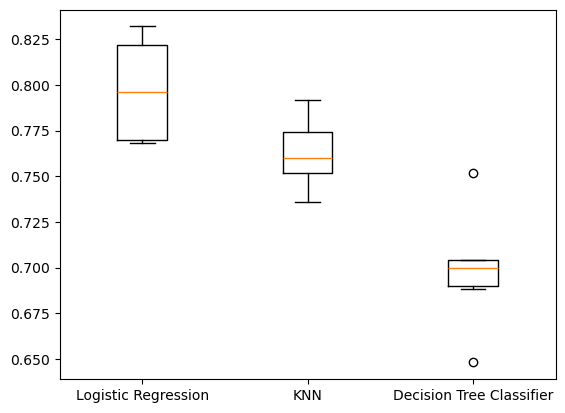

In [119]:
# Creamos nuestras matrices de caracteristicas y objetos
X = music_df.drop(["popularity_binary","popularity"], axis = 1).values
y = music_df["popularity_binary"].values

# Dividimos nuestros datos en entrenamiento y prueba
## El valor de test_size predeterminado será 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42)

# Instanciamos StandardScaler
scaler = StandardScaler()

# Escalamos nuestras características en el conjunto de entranamiento
X_train_scaled = scaler.fit_transform(X_train)

# Escalamos nuestras características en el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Crea el diccionario models
models = {
    "Logistic Regression": LogisticRegression(), 
    "KNN": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}
results = []

# Itera sobre los valores de models
for model in models.values():
  
  # Instancia un objeto KFold
  kf = KFold(n_splits = 6, random_state = 12, shuffle = True)
  
  # Realiza validación cruzada
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv = kf)
  results.append(cv_results)

# Dibujar boxplots
plt.boxplot(results, labels=models.keys())
plt.show()

**Interpretacion:** Parece que la regresión logística es el mejor candidato basado en los resultados de la validación cruzada.

- Terminemos construyendo un pipeline

#### Pipeline para predecir la popularidad de la canción: Regresión logística

Finalmente construiremos un pipeline para imputar valores faltantes, escalar atributos y ajustar los hiperparámetros de un modelo de regresión logística. 
- *El objetivo es encontrar los mejores parámetros y precisión al predecir la popularidad de la canción*.

In [120]:
# Crear steps
steps = [("imp_mean", SimpleImputer()), # Agregar la media a datos faltantes
         ("scaler", StandardScaler()), # Normalizar datos.
         ("logreg", LogisticRegression())]

# Configurar el pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Crear el objeto GridSearchCV
tuning = GridSearchCV(pipeline, param_grid = params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Calcular e imprime la precisión
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.744


**NOTA:**

Estos parámetros son opciones de configuración para un modelo de regresión logística en scikit-learn.

- **logreg__solver**: Este parámetro especifica el algoritmo a utilizar en el problema de optimización durante el entrenamiento del modelo de regresión logística. Los valores `"newton-cg"`, `"saga"` y `"lbfgs"` son diferentes algoritmos de optimización.
    - `"newton-cg"` implementa el método de Newton, un algoritmo de optimización que es bastante eficiente para conjuntos de datos pequeños.
    - `"saga"` es un algoritmo de optimización que es útil para conjuntos de datos grandes y/o con una alta dimensionalidad.
    - `"lbfgs"` es un algoritmo de optimización que aproxima el método de Newton, que es más eficiente en términos de memoria que el método de Newton.

- **logreg__C**: Este parámetro es el inverso de la fuerza de regularización. Es decir, a medida que `C` aumenta, la fuerza de regularización disminuye. La regularización es una técnica utilizada para prevenir el sobreajuste al agregar una penalización a los coeficientes del modelo. `np.linspace(0.001, 1.0, 10)` genera 10 valores de `C` igualmente espaciados entre 0.001 y 1.0.

Estos parámetros se suelen ajustar durante el proceso de ajuste de hiperparámetros para encontrar la mejor configuración para el modelo. En este caso, estamos preparando para una búsqueda en cuadrícula o algo similar, donde se prueban todas las combinaciones posibles de estos parámetros para encontrar la que produce el mejor rendimiento del modelo.